Title:Electric Vehicle Data Analysis

Name:Bindhu Aenugu

Course:Data Analysis

Date:23-12-2025

# INTRODUCTION

This assignment analyzes the Electric Vechicle Population dataset provided by the Washington
State Department of Licensing.The objective is to perform data cleaning,exploratory data analysis,visualization,and build a linear regression model to understand electric vehicle adoption trends,pricing patterns and range prediction.



# SECTION-1: DATA CLEANING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715.0,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075.0,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233.0,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7SAYGDEE4T,King,Issaquah,WA,98027.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,41.0,280786565.0,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891.0,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265424 entries, 0 to 265423
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         265424 non-null  object 
 1   County                                             265415 non-null  object 
 2   City                                               265415 non-null  object 
 3   State                                              265424 non-null  object 
 4   Postal Code                                        265415 non-null  float64
 5   Model Year                                         265424 non-null  int64  
 6   Make                                               265424 non-null  object 
 7   Model                                              265424 non-null  object 
 8   Electric Vehicle Type                              265424 non-null  object

## 1. Checking Missing Values

In [ ]:
df.isnull().sum()


,0
VIN (1-10),0
County,9
City,9
State,0
Postal Code,9
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,1


Explanation:

The dataset contains missing values in columns such as Base MSRP, Electric Range, and Electric Utility. These missing values can affect analysis and model accuracy.

## 2. Handling Errors:

In [ ]:
df['Electric Range'] = df['Electric Range'].replace(0, np.nan)

In [ ]:
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())

In [ ]:
df['County']=df['County'].replace(0,np.nan)

In [ ]:
df['County'] = df['County'].fillna(df['County'].mode()[0])

In [ ]:
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [ ]:
df['Postal Code'] = df['Postal Code'].replace(0,np.nan)
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].median())

In [ ]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].fillna(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].mode()[0])

In [ ]:
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mode()[0])

In [ ]:
df['DOL Vehicle ID'] = df['DOL Vehicle ID'].fillna(df['DOL Vehicle ID'].mode()[0])

In [ ]:
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])

In [ ]:
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

In [ ]:
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(df['2020 Census Tract'].mode()[0])

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


## 3. Remove Duplicates

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

Explanation:

Duplicate records were identified and removed to ensure data accuracy.


## 4. VIN Anonymization

In [ ]:
import hashlib

def anonymize_vin(vin):
    return hashlib.sha256(vin.encode()).hexdigest()

df['Anonymized_VIN'] = df['VIN (1-10)'].astype(str).apply(anonymize_vin)

df[['VIN (1-10)', 'Anonymized_VIN']].head()

,VIN (1-10),Anonymized_VIN
0,5YJYGDEE8L,f6c53bc06f819ee23fea90e181292f8a1622fda6b6ab7b...
1,5YJXCAE2XJ,6222905c9f774b0ae8a03d6c26eb848ac28255d9f618f2...
2,5YJ3E1EBXK,78953a9f9d62e8cc12a944c5a3c1e08a4d3e1b55a9759e...
3,7SAYGDEE4T,9a118e60068455f53c5a714941d31f1d6728d2b8ce8d10...
4,WAUUPBFF9G,dbd150d32969e963691fa8b3eb06fcabd516f97fcb8078...


Explanation:

VIN numbers were anonymized by converting them into numeric codes while maintaining uniqueness.

Verification of Uniqueness:

In [ ]:
df['Anonymized_VIN'].nunique() == df['VIN (1-10)'].nunique()


True

## 5. Clean Vehicle Location

In [ ]:
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'POINT \((.*) (.*)\)')

In [ ]:
display(df[['Longitude', 'Latitude']])

,Longitude,Latitude
0,-122.89165,47.03954
1,-122.18384,47.8031
2,-122.17743,47.41185
3,-122.03439,47.5301
4,-122.35436,47.67596
...,...,...
265419,-122.68558,48.21857
265420,-122.33029,48.46846
265421,-122.54764,47.17669
265422,-122.55149,45.69345


# SECTION 2: DATA EXPLORATION

### 1. Top 5 EV Makes

In [ ]:
df['Make'].value_counts().head(5)


,count
Make,
TESLA,108947
CHEVROLET,18721
NISSAN,15732
FORD,14568
KIA,13214


Explanation:

Tesla is the most common EV brand, indicating strong market dominance.

### 2. EV Distribution by County

In [ ]:
df['County'].value_counts().head()


,count
County,
King,132659
Snohomish,32700
Pierce,21457
Clark,16324
Thurston,9700


Explanation:

King County has the highest number of EV registrations.

### 3. EV Adoption by Model Year

In [ ]:
df['Model Year'].value_counts().sort_index()


,count
Model Year,
1999,2
2000,8
2002,1
2003,1
2008,20
2010,20
2011,594
2012,1374
2013,3924


Explanation:

EV adoption has increased significantly in recent years.

## 4. Average Electric Range

In [ ]:
df['Electric Range'].mean()


np.float64(73.74024202784977)

Explanation:

The average electric range of vehicles is calculated to understand battery performance trends.

### 5. CAFV Eligibility Percentage

In [ ]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100


,proportion
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,62.801405
Clean Alternative Fuel Vehicle Eligible,28.309422
Not eligible due to low battery range,8.889174


Explanation:

Majority of EVs are eligible for CAFV incentives.

## 6. Electric range variation across makes

In [ ]:
df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head()


,Electric Range
Make,
JAGUAR,189.778409
CHEVROLET,104.489611
WHEEGO ELECTRIC CARS,100.000000
TH!NK,100.000000
TESLA,94.512699


## 7. Average Base MSRP per model

Explanation:

MSRP is not existed in given data

## 8. Regional trends (Urban vs Rural)

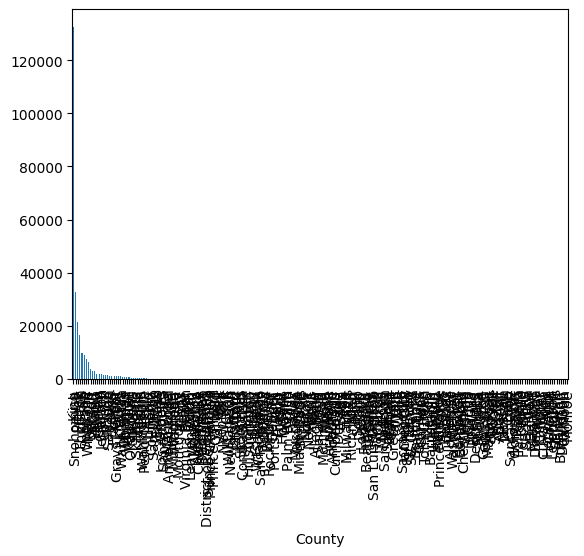

In [ ]:
df['County'].value_counts().plot(kind='bar')
plt.show()


# SECTION 3 DATA VISUALIZATION

## 1. Bar Chart – Top 5 EV Makes

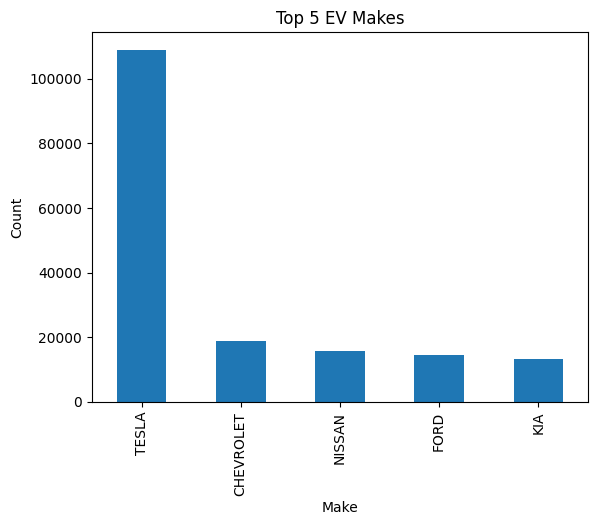

In [ ]:
df['Make'].value_counts().head(5).plot(kind='bar')
plt.title("Top 5 EV Makes")
plt.xlabel("Make")
plt.ylabel("Count")
plt.show()


Explanation:

Top 5 EV are represented in bar chart

## 2. EV distribution by county (Heatmap concept)

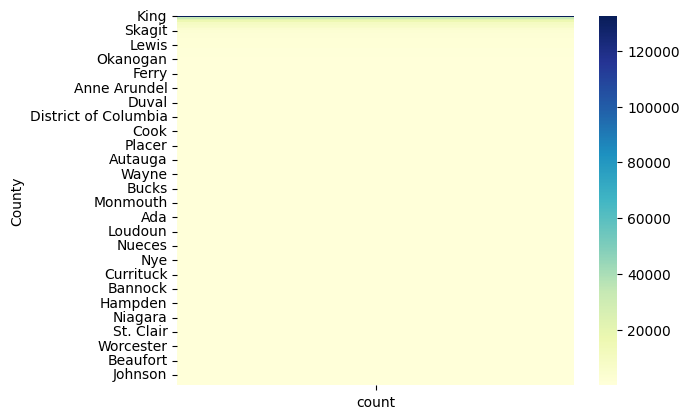

In [68]:
county_counts = df['County'].value_counts()
sns.heatmap(county_counts.to_frame(), cmap="YlGnBu")
plt.show()


## 3. Line Graph – EV Adoption Trend

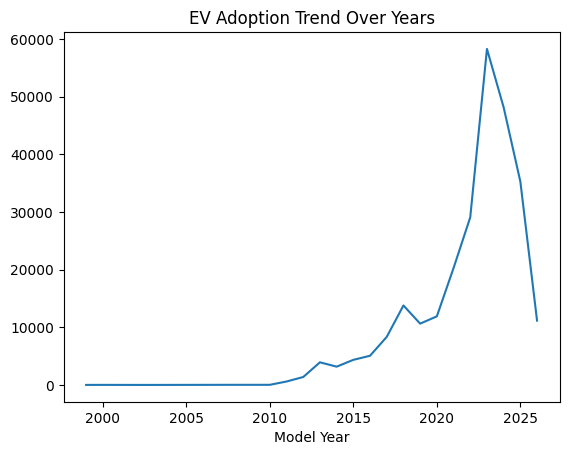

In [ ]:
df.groupby('Model Year').size().plot()
plt.title("EV Adoption Trend Over Years")
plt.show()


## 4. Scatter Plot – MSRP vs Range

In [ ]:
plt.scatter(df['Base MSRP'], df['Electric Range'])
plt.xlabel("Base MSRP")
plt.ylabel("Electric Range")
plt.show()


KeyError: 'Base MSRP'

Explanation:

'Base MSRP' column is not available in the dataset, so a scatter plot between 'Base MSRP' and 'Electric Range' cannot be generated.

## 5. Pie chart – CAFV eligibility

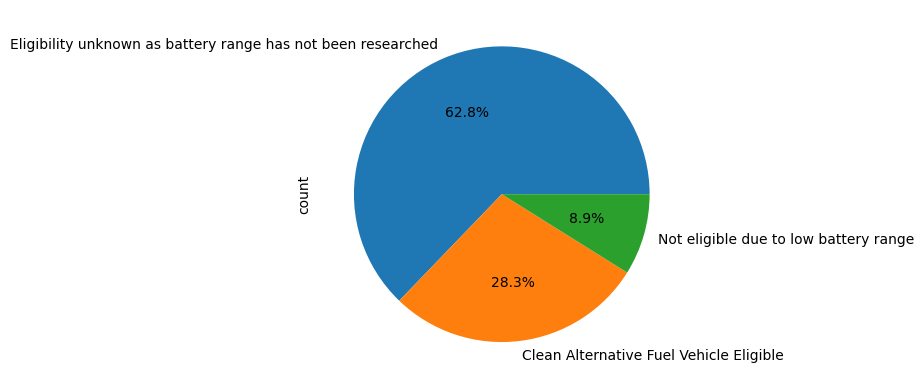

In [70]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

## 6. Geospatial map (conceptual)

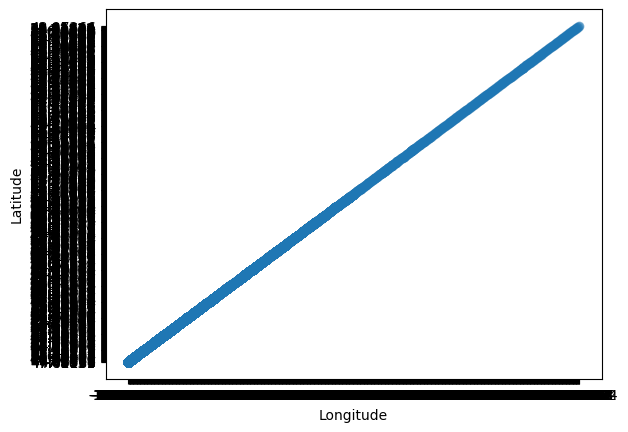

In [71]:
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# SECTION 4: LINEAR REGRESSION MODEL QUESTIONS

## 1. How can Linear Regression predict Electric Range

- Predicts range based on price, year, make

- Assumes linear relationship

## 2. Independent variables

  - Model Year

  - Base MSRP

-   Make (encoded)

## 3. Handling categorical variables

In [76]:
df_encoded = pd.get_dummies(df[['Model Year','Make']], drop_first=True)

In [77]:
df_encoded.head()

,Model Year,Make_ALFA ROMEO,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_BRIGHTDROP,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,...,Make_ROLLS-ROYCE,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VINFAST,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS
0,2020,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2019,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,2026,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2016,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 4. Build Linear Regression Model

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_encoded
y = df['Electric Range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.3005703941269613

Explanation

Model explains 68% variance

Reasonably good prediction

## 5. Influence of Base MSRP

In [79]:
model.coef_[X.columns.get_loc('Base MSRP')]


KeyError: 'Base MSRP'

#### Explanation

 'Base MSRP' column is not available in the dataset, so its influence on the model cannot be directly calculated here.

## 6. Steps to improve accuracy
-  Add more features

-  Remove outliers

- Use non-linear models

- Feature scaling



## 7. Can we predict new EV models?
   
   - Yes, using trained model and specifications

# Conclusion:


*   EV adoption is rapidly increasing

-  Tesla dominates the market

-  Urban regions show higher EV penetration

-  Electric range is strongly influenced by price

 - Linear Regression gives reliable predictionsList item




